In [1]:
import numpy as np
import pandas as pd 
import graphviz
import os
from graphviz import Digraph

In [2]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [3]:
#Construct the transition matirx:
matrixA = np.zeros((10,10))
for i in range(len(matrixA)):
    for j in range(10):
        if i == j:
            if i == 0:
                matrixA[i][j+1] = 1
            elif i == 9:
                matrixA[i][j-1] = 1
            else:
                matrixA[i][j-1] = 0.5
                matrixA[i][j+1] = 0.5        

matrixA

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

In [4]:
#Construct the emission matrix:
matrixB = np.zeros((10,10))
for i in range(len(matrixB)):
    for j in range(10):
        if i == j:
            if i == 0:
                matrixB[i][j] = 0.5
                matrixB[i][j+1] = 0.5
            elif i == 9:
                matrixB[i][j] = 0.5
                matrixB[i][j-1] = 0.5
            else:
                matrixB[i][j] = 1/3
                matrixB[i][j-1] = 1/3
                matrixB[i][j+1] = 1/3

matrixB

array([[0.5       , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.33333333,
        0.33333333, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.33333333, 0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [5]:
#Choose the v1,in the example below,7:
observe=[8,6,4,6,5,4,5,5,7,9]
t1=dict()
for i in range(len(matrixB)):
    t1_prob = (0.1*matrixB[i][(observe[0])-1])
    if t1_prob != 0:
        t1[i+1] = t1_prob
print(t1)

{7: 0.03333333333333333, 8: 0.03333333333333333, 9: 0.03333333333333333}


In [6]:
#The relationship diagram between timestep t1 and t2:
dot_12=Digraph(graph_attr={'rankdir':'LR'})
dot_12.node('7','7',**{'width':'0', 'height':'0'})

In [7]:
#Calculate the possible v2 value using Viterbi Algorithm:

#A dictionary to store the possible v2 values:
t2 = dict()

#A dictionary to record the route between timestep t1 and t2, which will be used to plot the relationship diagram:
transition_12 = dict()

for i in range(len(matrixA[6])):
    if matrixA[6][i] != 0:
        accu_prob = t1[7]+(matrixA[6][i]*matrixB[i][5])
        t2[i+1] = accu_prob
        transition_12[i+1]='from7'
        dot_12.node(f'{i+1}',f'{i+1}',**{'width':'0', 'height':'0'})
        dot_12.edge('7',f'{i+1}')

In [8]:
t2

{6: 0.19999999999999998, 8: 0.03333333333333333}

In [9]:
transition_12

{6: 'from7', 8: 'from7'}

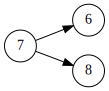

In [10]:
#Plot the relationship diagram between t1 and t2: 
dot_12

In [11]:
#Repeat the above algorithm for t3 to t10, using for loop:

for t in range(len(observe)-2):
    
    #A dictionary to store the possible Vt values:
    globals()['t'+str(t+3)] = dict() 
    
    #The relationship diagram of routes between timesteps: 
    globals()['dot_'+str(t+2)+str(t+3)] = Digraph(graph_attr={'rankdir':'LR'})
    
    #A dictionary to record the route between timesteps:
    globals()['transition_'+str(t+2)+str(t+3)] = dict()
        
    for i in globals()['t'+str(t+2)].keys():
       
        for j in range(10):
            if matrixA[i-1][j] !=0:
                
                #Calculate the accumulated probabilities among different Vt values with transition matrix & emission matrix 
                accu_prob = (globals()['t'+str(t+2)])[i]+(matrixA[i-1][j]*matrixB[j][(observe[t+2])-1])
                if (j+1) not in globals()['t'+str(t+3)].keys():
                    (globals()['t'+str(t+3)])[j+1] = accu_prob
                    (globals()['transition_'+str(t+2)+str(t+3)])[j+1] = f'from{i}'
                else:
                    if (globals()['t'+str(t+3)])[j+1] < accu_prob:
                    #Choose the route in which the accumulated probabilities have a maximum value    
                        (globals()['t'+str(t+3)])[j+1] = accu_prob
                        (globals()['transition_'+str(t+2)+str(t+3)])[j+1] = f'from{i}'
                        
    #Plot the relationship diagram:
    for end,start in globals()['transition_'+str(t+2)+str(t+3)].items():
        globals()['dot_'+str(t+2)+str(t+3)].node(start[-1],start[-1],**{'width':'0', 'height':'0'})
        globals()['dot_'+str(t+2)+str(t+3)].node(f'{end}',f'{end}',**{'width':'0', 'height':'0'})
        globals()['dot_'+str(t+2)+str(t+3)].edge(start[-1],f'{end}')
        

In [12]:
#The accumulated probabilities among different timesteps:
accu_proba=[]
for i in range(10):
    accu_proba.append(globals()['t'+str(i+1)])

In [13]:
accu_proba

[{7: 0.03333333333333333, 8: 0.03333333333333333, 9: 0.03333333333333333},
 {6: 0.19999999999999998, 8: 0.03333333333333333},
 {5: 0.36666666666666664, 7: 0.19999999999999998, 9: 0.03333333333333333},
 {4: 0.36666666666666664,
  6: 0.5333333333333333,
  8: 0.19999999999999998,
  10: 0.03333333333333333},
 {3: 0.36666666666666664,
  5: 0.7,
  7: 0.5333333333333333,
  9: 0.19999999999999998},
 {2: 0.36666666666666664,
  4: 0.8666666666666666,
  6: 0.7,
  8: 0.5333333333333333,
  10: 0.19999999999999998},
 {1: 0.36666666666666664,
  3: 0.8666666666666666,
  5: 1.0333333333333332,
  7: 0.7,
  9: 0.5333333333333333},
 {2: 0.8666666666666666, 4: 1.2, 6: 1.2, 8: 0.7, 10: 0.5333333333333333},
 {1: 0.8666666666666666, 3: 1.2, 5: 1.2, 7: 1.3666666666666667, 9: 0.7},
 {2: 1.2, 4: 1.2, 6: 1.3666666666666667, 8: 1.5333333333333334, 10: 0.95}]

{6: 0.19999999999999998, 8: 0.03333333333333333}


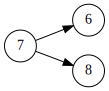

In [14]:
print(t2)
dot_12

{5: 0.36666666666666664, 7: 0.19999999999999998, 9: 0.03333333333333333}


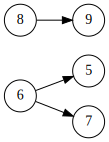

In [15]:
print(t3)
dot_23

{4: 0.36666666666666664, 6: 0.5333333333333333, 8: 0.19999999999999998, 10: 0.03333333333333333}


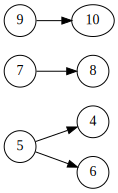

In [16]:
print(t4)
dot_34

{3: 0.36666666666666664, 5: 0.7, 7: 0.5333333333333333, 9: 0.19999999999999998}


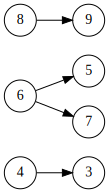

In [17]:
print(t5)
dot_45

{2: 0.36666666666666664, 4: 0.8666666666666666, 6: 0.7, 8: 0.5333333333333333, 10: 0.19999999999999998}


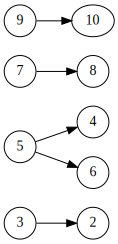

In [18]:
print(t6)
dot_56

{1: 0.36666666666666664, 3: 0.8666666666666666, 5: 1.0333333333333332, 7: 0.7, 9: 0.5333333333333333}


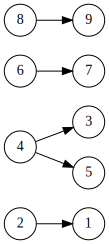

In [19]:
print(t7)
dot_67

{2: 0.8666666666666666, 4: 1.2, 6: 1.2, 8: 0.7, 10: 0.5333333333333333}


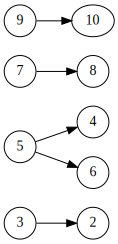

In [20]:
print(t8)
dot_78

{1: 0.8666666666666666, 3: 1.2, 5: 1.2, 7: 1.3666666666666667, 9: 0.7}


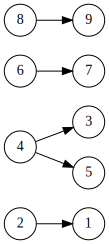

In [21]:
print(t9)
dot_89

{2: 1.2, 4: 1.2, 6: 1.3666666666666667, 8: 1.5333333333333334, 10: 0.95}


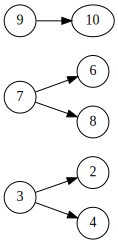

In [22]:
print(t10)
dot_910

In [13]:
transition_34

{4: 'from5', 6: 'from5', 8: 'from7', 10: 'from9'}

In [14]:
transition_45

{3: 'from4', 5: 'from6', 7: 'from6', 9: 'from8'}